<a href="https://colab.research.google.com/github/victoralves87/ETL_BI/blob/main/ETLCompleta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Supplement_Sales_Weekly_Expanded.csv")

In [3]:
df.head(5)

,Date,Product Name,Category,Units Sold,Price,Revenue,Discount,Units Returned,Location,Platform
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb


In [4]:
df.shape

(4384, 10)

In [23]:
df.columns

Index(['date', 'product_name', 'category', 'units_sold', 'price', 'revenue',
       'discount', 'units_returned', 'location', 'platform', 'ano', 'mês',
       'trimestre', 'revenue_sem_desconto', 'percentual_devolucao'],
      dtype='object')

In [6]:
df.isnull().sum()

,0
Date,0
Product Name,0
Category,0
Units Sold,0
Price,0
Revenue,0
Discount,0
Units Returned,0
Location,0
Platform,0


In [22]:
df.describe()

,date,units_sold,price,revenue,discount,units_returned,ano,mês,trimestre,revenue_sem_desconto,percentual_devolucao
count,4384,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000,4384.000000
mean,2022-08-18 12:00:00,150.200274,34.781229,5226.569446,12.439781,1.531478,2022.149635,6.284672,2.430657,6007.040607,1.018588
min,2020-01-06 00:00:00,103.000000,10.000000,1284.000000,0.000000,0.000000,2020.000000,1.000000,1.000000,1382.142857,0.000000
25%,2021-04-26 00:00:00,142.000000,22.597500,3349.372500,6.000000,1.000000,2021.000000,3.000000,1.000000,3839.125601,0.602410
50%,2022-08-18 12:00:00,150.000000,34.720000,5173.140000,12.000000,1.000000,2022.000000,6.000000,2.000000,5932.697107,0.729927
75%,2023-12-11 00:00:00,158.000000,46.712500,7009.960000,19.000000,2.000000,2023.000000,9.000000,3.000000,8013.264482,1.428571
max,2025-03-31 00:00:00,194.000000,59.970000,10761.850000,25.000000,8.000000,2025.000000,12.000000,4.000000,13664.800000,5.333333
std,NaN,12.396099,14.198309,2192.491946,7.179173,1.258479,1.522351,3.495858,1.135465,2565.838790,0.833740


In [26]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [28]:
df['ano'] = df['date'].dt.year

In [30]:
df['mês'] = df['date'].dt.month

In [31]:
df['trimestre'] = df['date'].dt.quarter

In [32]:
df.columns

Index(['date', 'product_name', 'category', 'units_sold', 'price', 'revenue',
       'discount', 'units_returned', 'location', 'platform', 'ano', 'mês',
       'trimestre', 'revenue_sem_desconto', 'percentual_devolucao'],
      dtype='object')

In [33]:
df.columns = (
    df.columns
      .str.strip()                # remove espaços extras
      .str.lower()                 # deixa tudo minúsculo
      .str.replace(' ', '_')       # troca espaços por underscore
      .str.replace('-', '_')       # troca hifens por underscore
)

In [34]:
df['product_name'].unique()

array(['Whey Protein', 'Vitamin C', 'Fish Oil', 'Multivitamin',
       'Pre-Workout', 'BCAA', 'Creatine', 'Zinc', 'Collagen Peptides',
       'Magnesium', 'Ashwagandha', 'Melatonin', 'Biotin',
       'Green Tea Extract', 'Iron Supplement', 'Electrolyte Powder'],
      dtype=object)

In [15]:
df['discount'] = df['discount'] * 100
# 2. Receita sem desconto
df['revenue_sem_desconto'] = df['revenue'] / (1 - (df['discount'] / 100))

In [16]:
#percentual de devolução
df['percentual_devolucao'] = (df['units_returned'] / df['units_sold']) * 100


In [17]:
# Save the DataFrame to a CSV file
df.to_csv('supplement_transformado.csv', index=False)

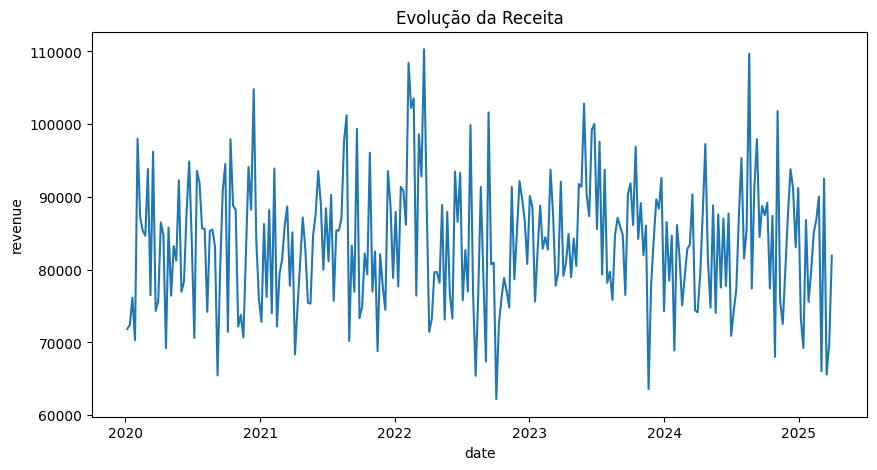

In [37]:
# Evolução da receita
plt.figure(figsize=(10,5))
sns.lineplot(data=df.groupby("date")["revenue"].sum().reset_index(), x="date", y="revenue")
plt.title("Evolução da Receita")
plt.show()

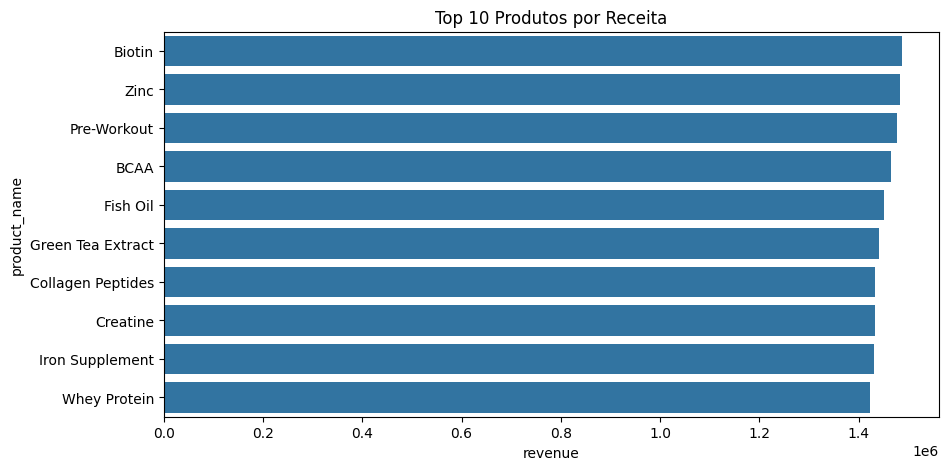

In [41]:
# Top 10 produtos por receita
top10 = df.groupby("product_name")["revenue"].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top10, x="revenue", y="product_name")
plt.title("Top 10 Produtos por Receita")
plt.show()

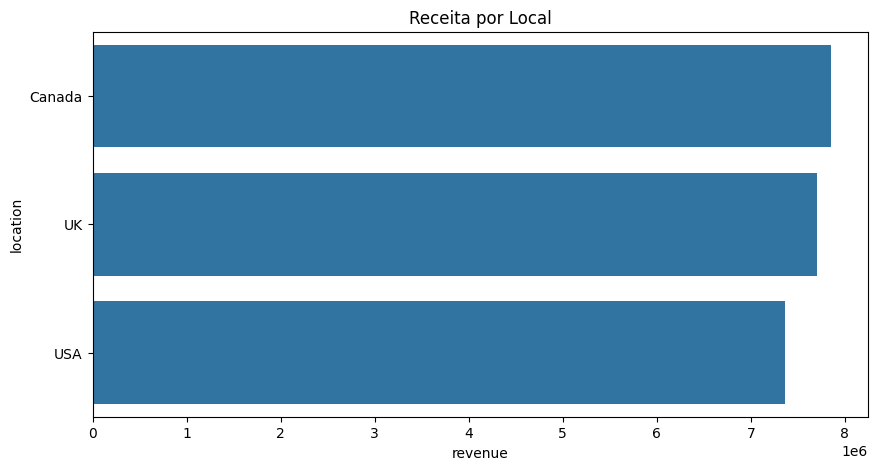

In [42]:
# Análises Geográficas
# -------------------------------
receita_por_local = df.groupby("location")["revenue"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=receita_por_local, x="revenue", y="location")
plt.title("Receita por Local")
plt.show()